In [1]:
# !pip install wordcloud
# !pip install multidict

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
from os import path
import MeCab
import unidic
import sys
import re
import unicodedata
import matplotlib.pyplot as plt
import tqdm
import japanize_matplotlib
import collections
import glob
import multidict as multidict

## wordcloud for all words

In [3]:
# Create wordcloud image for every words
fields = ['word',"total"]

## CHANGE FILE NAME!!!
text_all = pd.read_csv('japeseMaleIdol_text_overall.csv', encoding='UTF-8',usecols=fields)
text_all.set_index("word").to_dict()
text_all_dict = text_all.set_index("word").to_dict()['total']

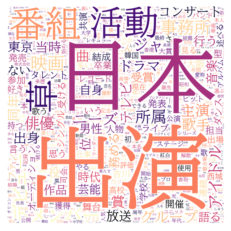

In [4]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600,colormap='magma')

# generate word cloud
wc.generate_from_frequencies(text_all_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_japaneseMalIdol_all.png")


In [5]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("japaneseMaleIdolAll.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Noun wordcloud

In [6]:
# create wc for noun(名詞)
# CHANGE FILE NAME!!!
df = pd.read_csv('japeseMaleIdol_text_overall.csv', encoding='UTF-8')
noun = df[df.pos == "名詞"]
noun2 = noun.drop("pos", axis=1)
noun2.head()

,word,total,articles
0,出演,506,109
1,日本,408,161
2,番組,382,87
3,活動,357,105
4,草,344,5


In [7]:
noun2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8459 entries, 0 to 9885
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      8459 non-null   object
 1   total     8459 non-null   int64 
 2   articles  8459 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 264.3+ KB


In [8]:
noun_dict = noun2.set_index("word").to_dict()['total']

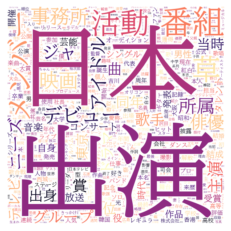

In [9]:
wc = WordCloud(background_color="white", \
               max_words=1000,font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600,colormap='magma')

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(noun_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_japaneseMaleIdol_noun.png")


In [10]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("japaeseMaleIdolNoun.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Verb

In [11]:
# verb (動詞)
df = pd.read_csv('japeseMaleIdol_text_overall.csv', encoding='UTF-8')
## CHANGE POS
verb = df[df.pos == "動詞"]
verb2 = verb.drop("pos", axis=1)
verb2.head()

,word,total,articles
29,行う,157,57
31,務める,145,69
38,語る,128,38
46,いう,112,40
49,言う,104,41


In [12]:
verb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 29 to 9858
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      1250 non-null   object
 1   total     1250 non-null   int64 
 2   articles  1250 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 39.1+ KB


In [13]:
verb_dict = verb2.set_index("word").to_dict()['total']

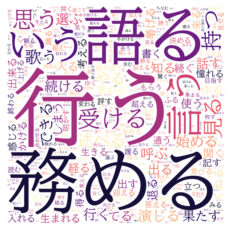

In [14]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600,colormap='magma')

# generate word cloud
## CHANGE (blah)
wc.generate_from_frequencies(verb_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_japaneseMaleIdol_verb.png")

In [21]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("japaneseMemaleIdolVerb.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)

## Adjective

In [16]:
# adj (形容詞)
df = pd.read_csv('japeseMaleIdol_text_overall.csv', encoding='UTF-8')
## CHANGE POS
adj = df[df.pos == "形容詞"]
adj2 = adj.drop("pos", axis=1)
adj2.head()

,word,total,articles
36,ない,128,50
79,多い,74,37
122,いい,58,22
141,高い,53,24
226,強い,37,19


In [17]:
adj2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 36 to 9836
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   word      177 non-null    object
 1   total     177 non-null    int64 
 2   articles  177 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ KB


In [18]:
adj_dict = adj2.set_index("word").to_dict()['total']

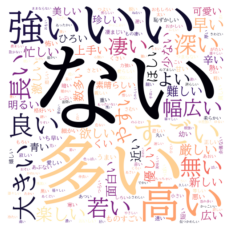

In [19]:
wc = WordCloud(background_color="white", \
               max_words=500, #change if needed\
               font_path= "C:\Windows\Fonts\BIZ-UDMinchoM.TTC",\
               width=600,height=600,colormap='magma')

# generate word cloud
## CHANGE (blah)!!!!
wc.generate_from_frequencies(adj_dict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
# plt.show()

#save
### CHANGE FILE NAME!!
wc.to_file("wc_japaneseMaleIdol_adj.png")

In [20]:
# create a html file
# link each word to online Japanese dictionary (https://jisho.org/)
wc.to_svg()

# JavaScript to link each word
link_script = """
<script>
    svg = document.querySelectorAll("svg text").forEach(element => {
    element.addEventListener("click", function() {
        word = this.textContent;
        word_uri = encodeURI(word);
        url = "https://jisho.org/search/" + word_uri;
        window.open(url, "_blank");
    })
})
</script>"""

# HTML
## CHANGE FILE NAME!!!
with open("japaneseMaleIdolAdj.html", "w", encoding='UTF-8') as f:
    f.write("<!DOCTYPE HTML>\n")
    f.write(wc.to_svg())
    f.write(link_script)